In [32]:
## This file will open any downloaded netCDF files and process them

import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import json
import xarray as xr

file_2 = netCDF4.Dataset('./CMIP6/sfcWind_day_ACCESS-ESM1-5_ssp126_r34i1p1f1_gn_20150101-20641231.nc')
file = xr.open_dataset('./CMIP6/sfcWind_day_ACCESS-ESM1-5_ssp126_r34i1p1f1_gn_20150101-20641231.nc')
print(file)

<xarray.Dataset>
Dimensions:    (time: 18263, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2064-12-31T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    sfcWind    (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2021-07-12T02:43:03Z
    ...                     ...
    variable_id:            sfcWind
    variant_label:          r34i1p1f1
    version:                v20210712
    license:     

In [2]:
print(file.variables.keys())

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'sfcWind'])


In [33]:
sfcWindmvar = file_2.variables['sfcWind']

#sfcWind = sfcWindmvar[0,0,::-1,:] 
print(sfcWindmvar)

<class 'netCDF4._netCDF4.Variable'>
float32 sfcWind(time, lat, lon)
    standard_name: wind_speed
    long_name: Daily-Mean Near-Surface Wind Speed
    comment: near-surface (usually, 10 meters) wind speed.
    units: m s-1
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2021-07-12T02:43:03Z altered by CMOR: Treated scalar dimension: 'height'.
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
unlimited dimensions: time
current shape = (18263, 145, 192)
filling on


In [34]:
sfcWind = sfcWindmvar[1, :, ::-1]

print('shape=%s, type=%s, missing_value=%s' % \
 (sfcWind.shape, type(sfcWind), sfcWindmvar.missing_value))

shape=(145, 192), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=1e+20


In [29]:
print(sfcWindmvar)

<xarray.Variable (time: 18263, lat: 145, lon: 192)>
[508441920 values with dtype=float32]
Attributes:
    standard_name:  wind_speed
    long_name:      Daily-Mean Near-Surface Wind Speed
    comment:        near-surface (usually, 10 meters) wind speed.
    units:          m s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2021-07-12T02:43:03Z altered by CMOR: Treated scalar dime...


In [6]:
%matplotlib inline

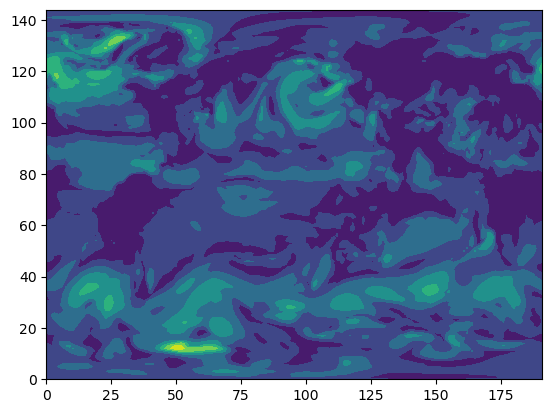

In [35]:
cs = plt.contourf(sfcWind)

shape=(26, 22), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=1e+20


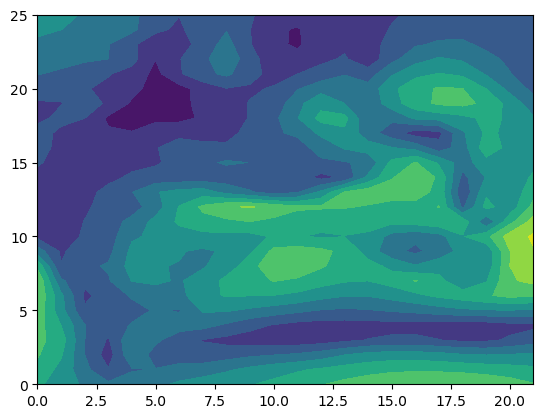

In [44]:
# Here we want to be able to subset the data

#Bounding boxes
#uk = [-7.57216793459, 49.959999905, 1.68153079591, 58.6350001085]
#uk = (73.6753792663, 18.197700914, 135.026311477, 53.4588044297)
uk = (113.338953078, -43.6345972634, 153.569469029, -10.6681857235)
latbounds = [uk[1], uk[3]]
lonbounds = [uk[0], uk[2]]

lats = file_2.variables["lat"][:]
lons = file_2.variables["lon"][:]
time = file_2.variables["time"]

# latitude lower and upper index
latli = np.argmin( np.abs( lats - latbounds[0] ))
latui = np.argmin( np.abs( lats - latbounds[1] )) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonbounds[0] ))
lonui = np.argmin( np.abs( lons - lonbounds[1] ))  

sfcWindSubset = file_2.variables['sfcWind']

sfcWind = sfcWindSubset[0, latli:latui , lonli:lonui]
sfcWind = sfcWind[:,::-1]

## WRITING TO A NEW FILE ##

#sfcWind.to_netcdf(path = './Processed/sfcWind_day_ACCESS-ESM1-5_ssp126_r34i1p1f1_gn_20150101-20641231.nc')

print('shape=%s, type=%s, missing_value=%s' % \
 (sfcWind.shape, type(sfcWind), sfcWindmvar.missing_value))

sf = plt.contourf(sfcWind)

<xarray.DataArray 'sfcWind' (time: 18263, lat: 26, lon: 21)>
[9971598 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2064-12-31T12:00:00
  * lat      (lat) float64 -42.5 -41.25 -40.0 -38.75 ... -13.75 -12.5 -11.25
  * lon      (lon) float64 114.4 116.2 118.1 120.0 ... 146.2 148.1 150.0 151.9
    height   float64 ...
Attributes:
    standard_name:  wind_speed
    long_name:      Daily-Mean Near-Surface Wind Speed
    comment:        near-surface (usually, 10 meters) wind speed.
    units:          m s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2021-07-12T02:43:03Z altered by CMOR: Treated scalar dime...


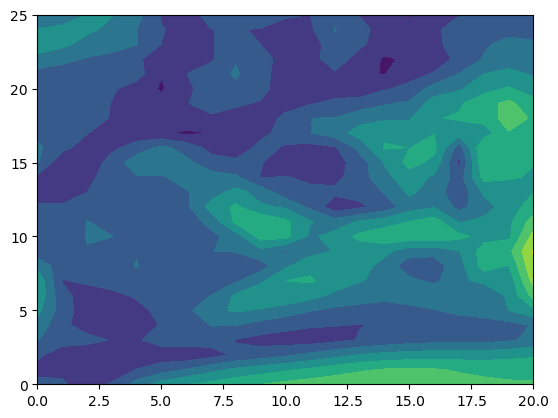

In [51]:
lat_bnds, lon_bnds = [-43.6345972634, -10.6681857235], [113.338953078, 153.569469029]
subset = file.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds))

#subset.to_netcdf('test.nc')

#subset.variables.keys()

print(subset.sfcWind)

test = subset.sfcWind
globe = file.sfcWind

plt.contourf(test[1,:,::-1])
#plt.contourf(globe[1,:,::-1])